Имеется датасет, полученный в ходе исследования факторов, способных повлиять на депрессию людей, живущих в сельской местности. Задача модели ML --- научиться определять склонность к депрессии (0 --- не страдает, 1 --- страдает). Это типичная задача **бинарной классификации**. Hассмотрим одну из популярных моделей для этой задачи --- логистическую регрессию.

# Логистическая регрессия


Так сложилось, что в задачах бинарной классификации мы большее значение придаём тому, чтобы научиться определять класс 1, нежели класс 0. Класс 1 представляет собой в каком-то смысле "редкое" событие: письмо со спамом, неплатёжеспособность клиента, наличие заболевания, склонность к депрессии. Будем называть его "положительным" классом, а класс 0 --- "отрицательным". Во многих ситуациях нам важнее знать **оценку вероятности** того, что объект попадёт в положительный класс (вероятность невозврата кредита, вероятность заболевания, вероятность склонности к депрессии). Тогда, задавая различные пороги для этой вероятности (в зависимости от задачи), мы будем таким образом разделять объекты.

Обозначим вероятность положительного события через $P_+$. Очевидно, что вероятность противоположного класса тогда равна $(1-P_+)$. Составим величину, называемую odds ratio ("отношение шансов"):

$$
OR = \frac{P_+}{1-P_+}.
$$

$OR$ показывает отношение вероятностей того, произойдёт наше событие или не произойдёт. При этом величины $P_+$ и $OR$ содержат, по сути, одинаковую информацию. Но если $P_+\in(0; 1)$, то $OR\in(0; +\infty)$. Если теперь рассмотреть величину логарифма отношения шансов $\log OR$, то мы придём к тому, что $\log OR\in(-\infty; +\infty)$. И вот мы получили, что можем прогнозировать **вероятность**, прогнозируя величину, лежащую от минус до плюс бесконечности! А эту величину можно предсказывать с помощью **регрессионной модели**. 

## Сигма-функция

Пусть теперь мы прогнозируем $\log OR$ с помощью линейной регрессии: $\log OR=\mathbf{w}^T\mathbf{x}$. Как из этой величины получить $P_+$?

$$
P_+ = \frac{OR}{1+OR} = \frac{e^{\log OR}}{1+e^{\log OR}}=\frac{e^{\mathbf{w}^T\mathbf{x}}}{1+e^{\mathbf{w}^T\mathbf{x}}}=\frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}}.
$$

Интересно, что мы получили здесь довольно важную функцию в машинном обучении (нет, на этот раз не логарифм :)):

$$
\sigma(z) = \frac{1}{1+e^{-z}},
$$

называемую сигма-функцией, или сигмоидой, или **логистической функцией**. Она ведёт себя так:
![](https://www.researchgate.net/profile/John_Davis82/publication/234049070/figure/fig6/AS:300093912698893@1448559372458/Logistic-sigmoid-function-Maps-real-numbers-to-the-interval-between-0-and-1.png)

Итак, $P_+=\sigma(\mathbf{w}^T\mathbf{x})$. Это важный результат.

Тем самым, с помощью логистической регрессии мы будем прогнозировать **вероятность принадлежности объекта к классу 1**.

## LogLoss, или логистическая функция потерь

Следующий важный момент: **как считать ошибку модели в случае бинарной классификации**? Иными словами, как выбрать функцию потерь и составить функционал качества?

Вновь вспомним принцип максимального правдоподобия. Только что мы получили, что

$$
P_+ = P(y=1 | \mathbf{x}_i, \mathbf{w}) = \sigma(\mathbf{w}^T\mathbf{x}).
$$

Но тогда

$$
P_- = P(y=-1 | \mathbf{x}_i, \mathbf{w}) = 1 - P_+ = 1 - \sigma(\mathbf{w}^T\mathbf{x}_i).
$$

Здесь мы обозначили класс "0" как "-1" для удобства выкладок. Далее можно заметить (проверьте!), что $1 - \sigma(\mathbf{w}^T\mathbf{x}_i)=\sigma(-\mathbf{w}^T\mathbf{x}_i)$: первое из поразительных свойств сигмоиды --- то ли ещё будет! Учитывая последнее, можно записать **общую формулу** для вероятности:

$$
P(y=y_i | \mathbf{x}_i, \mathbf{w}) = \sigma(y_i\mathbf{w}^T\mathbf{x}_i).
$$

Тогда вероятность всей выборки (взятой независимо и из одного распределения) запишется как произведение вероятностей:

$$
P(\mathbf{y}|\mathbf{X}, \mathbf{w}) = \prod_{i=1}^{l} P(y=y_i | \mathbf{x}_i, \mathbf{w}).
$$

Это **функция правдоподобия выборки**. Её нужно максимизировать. Как обычно, вместо максимизации произведения множества слагаемых нам бы хотелось максимизировать сумму. Поэтому возьмём логарифм правдоподобия:

$$
\begin{multline*}
\log P(\mathbf{y}|\mathbf{X}, \mathbf{w}) = \log \prod_{i=1}^{l} P(y=y_i | \mathbf{x}_i, \mathbf{w}) = 
\sum_{i=1}^{l} \log P(y=y_i | \mathbf{x}_i, \mathbf{w}) = \\
=\sum_{i=1}^{l} \log \sigma(y_i\mathbf{w}^T\mathbf{x}_i) = \sum_{i=1}^{l} \log \frac{1}{1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}}=-\sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right) \to \max\limits_\mathbf{w},
\end{multline*}
$$

то есть максимизация прадоподобия эквивалентна минимизации функционала

$$
Q(\mathbf{w}) = \sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right) \to \min\limits_\mathbf{w}.
$$

Последний функционал под знаком суммы содежит **логистическую функцию потерь**, или лог-лосс: $L_{log}(z)=\log(1+e^{-z})$. Её график выглядит следующим образом:
![](https://www.researchgate.net/profile/Thomas_Hofmann10/publication/2877976/figure/fig1/AS:650449568923660@1532090670890/Loss-values-of-0-1-exp-and-log-loss-functions-in-a-binary-classification-problem.png)

и мажорирует обычную пороговую функцию потерь:
$$
L(y, \widehat{y}) = \begin{cases}0, & \text{if } y=\widehat{y}, \\ 1, & \text{if } y\neq\widehat{y}. \end{cases}
$$

Итак, мы только что показали, что, с точки зрения статистики и метода максимального правдоподобия, **оптимальным выбором функции потерь** для логистической регрессии является **лог-лосс**, или **логистическая функция потерь**. Минимизируя лог-лосс, мы тем самым уменьшаем число ошибок классификации.

## Регуляризация логистической регрессии

В моделях логистической регрессии, как и в линейной регрессии, используют разные типы **регуляризации** ($L_1$, $L_2$, Elastic Net) для уменьшения переобучения модели. Функционал качества в случае $L_2$-регуляризации выглядит так:

$$
Q_{reg}(\mathbf{w}) = C\cdot \sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right)+\|\mathbf{w}\|^2 \to \min\limits_\mathbf{w}.
$$

Здесь гиперпараметр $C>0$ играет роль **обратной силы регуляризации**. Чем больше $C$, тем меньше "штраф" за увеличение весов модели. И наоборот, чем меньше $C$, тем эффект регуляризации больше.

## Почему логистическая регрессия --- это линейный классификатор?

Мы ещё не обсудили вопрос, почему же рассмотренная нами модель относится к **линейным моделям**. Для этого рассмотрим игрушечный пример с точками на плоскости.

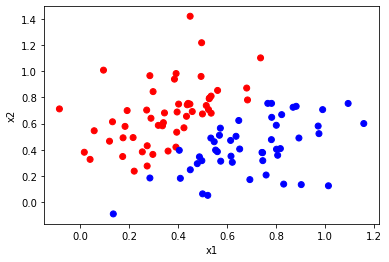

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(14823) #задаём начальные условия для генератора псевдослучайных чисел
X = np.random.normal(loc=0.5, scale=0.25, size=(100, 2))
y = (X[:, 1] > X[:, 0]).astype('int') # разделяющая граница: y=x (биссектриса первой четверти)
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in y])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [2]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

w = log_reg.coef_
bb = log_reg.intercept_

print(w, bb)

[[-3.65309304  2.84306308]] [0.41639677]


Построим разделяющую границу между классами, которую "выучила" наша модель. Для этого запишем уравнение
$$
w_1\cdot x_1 + w_2\cdot x_2 + b = 0
$$
и выразим из него $x_2$ для более привычного построения графика:
$$
x_2 = -\frac{w_1}{w_2}x_1-\frac{b}{w_2}.
$$

In [3]:
w1 = w[0][0]
w2 = w[0][1]
b = bb[0]

print('w1 = '+str(w1), '\nw2 = '+str(w2), '\nb = '+str(b))

w1 = -3.65309303588269 
w2 = 2.8430630848213894 
b = 0.41639676635644257


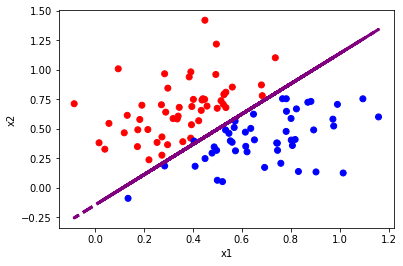

In [4]:
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in y])
plt.plot(X[:, 0], -w1/w2*X[:, 0]-b/w2, color='purple', linewidth=3, linestyle="dashed")

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Итак, модель логистической регрессии почти идеально восстановила нашу разделяющую границу. А что будет, если разделяющая граница нелинейна?

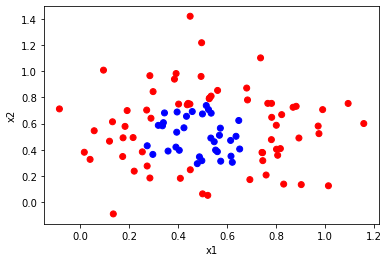

In [5]:
yy = ((X[:, 0]-0.5)**2 + (X[:, 1]-0.5)**2 > 0.25**2).astype('int')
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in yy])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Теперь посмотрим, что выучит наша модель.

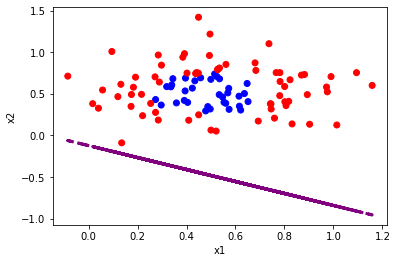

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X, yy)

w1 = log_reg.coef_[0][0]
w2 = log_reg.coef_[0][1]
b = log_reg.intercept_[0]

plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in yy])
plt.plot(X[:, 0], -w1/w2*X[:, 0]-b/w2, color='purple', linewidth=3, linestyle="dashed")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Как видим, несмотря на изменения в исходных данных, модель по-прежнему "учит" только линейную границу между классами, причём в данном случае далеко от идеала.

Тем не менее, в многомерных пространствах картинка получается лучше, и даже линейный классификатор способен дать хороший результат. Кроме того, мы можем использовать приём, который называется **"создание полиномиальных признаков"**. Это означает, что, помимо $x_1, x_2, \ldots, x_n$, модель также рассматривает их попарные произведения степени не выше $k$ (в случае $k=2$ это будут $x_1^2$, $x_1x_2$, $x_2^2$) в качестве признаков. Этот приём описан в [статье](https://habr.com/ru/company/ods/blog/323890/) OpenDataScience-сообщества (раздел 4). 

# Логистическая регрессия в действии

## Загрузка и препроцессинг

In [7]:
import pandas as pd
# Higher Education Students Performance Evaluation Dataset Data Set
df = pd.read_csv('6pr2_PanfilovMD.csv', delimiter=';')

# Удаляем лишние данные
df.drop("STUDENT ID", axis="columns", inplace=True)
df = df[df['1'] != 3]
df.head()

1  2  3  4  5  6  7  8  9  10  ...  23  24  25  26  27  28  29  30  \
0  2  2  3  3  1  2  2  1  1   1  ...   1   1   3   2   1   2   1   1   
1  2  2  3  3  1  2  2  1  1   1  ...   1   1   3   2   3   2   2   3   
2  2  2  2  3  2  2  2  2  4   2  ...   1   1   2   2   1   1   2   2   
3  1  1  1  3  1  2  1  2  1   2  ...   1   2   3   2   2   1   3   2   
4  2  2  1  3  2  2  1  3  1   4  ...   2   1   2   2   2   1   2   2   

   COURSE ID  GRADE  
0          1      1  
1          1      1  
2          1      1  
3          1      1  
4          1      1  

[5 rows x 32 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 144
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1          135 non-null    int64
 1   2          135 non-null    int64
 2   3          135 non-null    int64
 3   4          135 non-null    int64
 4   5          135 non-null    int64
 5   6          135 non-null    int64
 6   7          135 non-null    int64
 7   8          135 non-null    int64
 8   9          135 non-null    int64
 9   10         135 non-null    int64
 10  11         135 non-null    int64
 11  12         135 non-null    int64
 12  13         135 non-null    int64
 13  14         135 non-null    int64
 14  15         135 non-null    int64
 15  16         135 non-null    int64
 16  17         135 non-null    int64
 17  18         135 non-null    int64
 18  19         135 non-null    int64
 19  20         135 non-null    int64
 20  21         135 non-null    int64
 21  22         135 n

In [9]:
df.nunique()

1            2
2            2
3            3
4            5
5            2
6            2
7            2
8            5
9            4
10           4
11           6
12           6
13           5
14           3
15           5
16           5
17           5
18           3
19           3
20           2
21           3
22           2
23           3
24           2
25           3
26           3
27           3
28           3
29           5
30           4
COURSE ID    9
GRADE        8
dtype: int64

In [10]:
pd.unique(df['1'])

array([2, 1], dtype=int64)

Все столбцы числовые, однако данные всё ещё не готовы к построению модели. Нам необходимо:
* убрать пропуски (в столбце **no_lasting_investmen**);
* убрать лишний признак **Survey_id** (номер опроса);
* перевести категориальные признаки в бинарные (get_dummies);
* стандартизировать признаки с неудобным масштабом.

In [11]:

df_1 = df.dropna() #удаляем пропуски во всей таблице

df_2 = df_1.drop(["1"], axis=1) #удаляем ненужные столбцы

df_3 = pd.get_dummies(df, columns=['GRADE'])

df_3.head()

1  2  3  4  5  6  7  8  9  10  ...  30  COURSE ID  GRADE_0  GRADE_1  \
0  2  2  3  3  1  2  2  1  1   1  ...   1          1        0        1   
1  2  2  3  3  1  2  2  1  1   1  ...   3          1        0        1   
2  2  2  2  3  2  2  2  2  4   2  ...   2          1        0        1   
3  1  1  1  3  1  2  1  2  1   2  ...   2          1        0        1   
4  2  2  1  3  2  2  1  3  1   4  ...   2          1        0        1   

   GRADE_2  GRADE_3  GRADE_4  GRADE_5  GRADE_6  GRADE_7  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 39 columns]

## Построение модели и валидация

In [12]:
X = df_2
y = df_1['1']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_valid)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.6764705882352942


## Метрики на основе confusion matrix

Разберёмся, так ли хороша наша модель, как кажется (accuracy=84.7 %). Для начала посмотрим на соотношение классов в задаче.

In [14]:
y.value_counts(normalize=True)

2    0.518519
1    0.481481
Name: 1, dtype: float64

<AxesSubplot:>

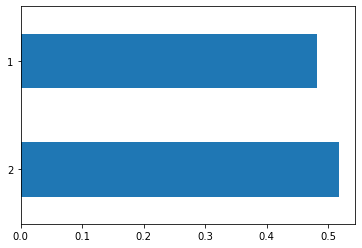

In [15]:
y.value_counts(normalize=True).plot(kind='barh')

Мы видим, что объектов класса 0 в выборке значительно больше (83.3 %), чем объектов класса 1. Если бы мы решили построить константный классификатор, который предсказывает 0 ВСЕГДА, то accuracy такого классификатора была бы примерно 83.3 %. Из этого можно сделать вывод, что accuracy --- далеко не лучший выбор метрики качества для случая несбалансированных классов.

Какие же есть альтернативы? Прежде всего, это матрица ошибок (confusion_matrix). В ней по строкам расположены истинные значения классов, а по столбцам --- предсказанные моделью. Их обычно обзначают так:
$$
\text{Confusion_Matrix}=
\begin{array}{c|cc} 
& \text{0_pred} & \text{1_pred} \\ \hline
\text{0_true} & TN & FP \\ 
\text{1_true} & FN & TP\end{array}
$$

Здесь:
* $TN$ --- True Negative (правильный отрицательный) --- количество объектов класса 0, которые модель опознала верно;
* $TP$ --- True Positive (правильный положительный) --- количество объектов класса 1, которые модель опознала верно;
* $FP$ --- False Positive (ложный положительный) --- количество объектов класса 0, которые модель ошибочно отнесла к классу 1;
* $FN$ --- False Negative (ложный отрицательный) --- количество объектов класса 1, которые модель ошибочно отнесла к классу 0.

В идеальном случае данная матрица содержит нули вне главной диагонали. На практике же, в зависимости от задачи, мы бы хотели **минимизировать** значения $FN$ либо $FP$. К примеру, в задаче обнаружения спама нам бы не хотелось, чтобы модель помечала как спам нормальные письма, т. е. хотим как можно меньше **ложных срабатываний** (False Positive). В задаче же медицинской диагностики куда важнее не пропустить больных (т. е. нужно минимизировать **пропуски класса 1**, False Negative).

Построим такую матрицу в нашей задаче обнаружения склонности к депрессии.

In [16]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_valid, y_pred))

[[ 9  8]
 [ 3 14]]


C:\Users\mdpan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


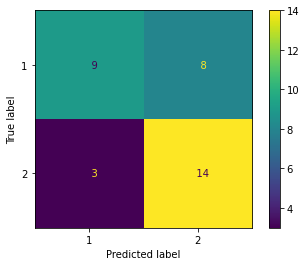

In [17]:
plot_confusion_matrix(log_reg, X_valid, y_valid, values_format='5g')

Итак, наша модель определяет 4 человек как склонных к депрессии (в то время как они "здоровы"), а также 50 человек помечает "здоровыми", в то время как они склонны к депрессии. Последнее обстоятельство явно не очень хорошо. Ведь всего у нас было 52 случая склонности к депрессии, из которых модель сумела найти только два!

### Точность, полнота и F-мера

На основе матрицы ошибок можно построить следующие три метрики, каждая из которых лучше отображает результаты классификации для несбалансированных классов. Это **точность** (precision), **полнота** (recall) и **F-мера** (f1_score).

$$
\text{Confusion_Matrix}=
\begin{array}{c|cc} 
& \text{0_pred} & \text{1_pred} \\ \hline
\text{0_true} & TN & FP \\ 
\text{1_true} & FN & TP\end{array}
$$

* $\text{Precision}=\dfrac{TP}{TP+FP}$: показывает, насколько можно "доверять" модели, если она показала класс 1;
* $\text{Recall}=\dfrac{TP}{TP+FN}$: показывает, как хорошо модель умеет находить класс 1;
* $F_1=\dfrac{2\cdot \text{Precision}\cdot \text{Recall}}{\text{Precision}+\text{Recall}}$: гармоническое среднее между точностью и полнотой.

Таким образом, 
* если мы хотим минимизировать $FP$, то лучше в качестве метрики брать precision;
* если мы хотим минимизировать $FN$, то лучше в качестве метрики брать recall;
* если мы сомневаемся или хотим минимизировать оба значения, лучше подойдёт f1_score.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision:', precision_score(y_valid, y_pred))
print('Recall:', recall_score(y_valid, y_pred))
print('F1 score:', f1_score(y_valid, y_pred))

Precision: 0.75
Recall: 0.5294117647058824
F1 score: 0.6206896551724139


## Настройка гиперпараметров логистической регрессии по f1_score

Попробуем настроить параметр C (силу регуляризации) для каждого типа регуляризации.

### Регуляризация L2 (по умолчанию)

In [19]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='liblinear')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='f1')

In [20]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 10.0}
0.6624287992709045


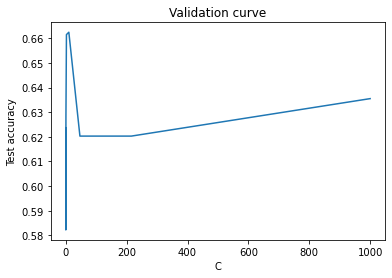

In [21]:
results_df = pd.DataFrame(logreg_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

### Регуляризация L1

In [22]:
log_reg = LogisticRegression(solver='liblinear', penalty='l1')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='f1')

In [23]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 0.001}
0.6439747868001483


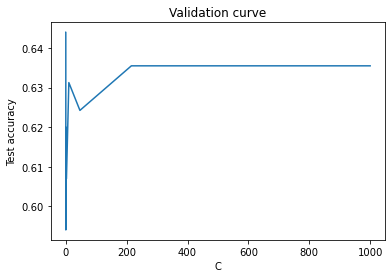

In [24]:
results_df = pd.DataFrame(logreg_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [25]:
y_pred = logreg_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[17  0]
 [17  0]]
F1 score valid: 0.6666666666666666


Стала ли наша модель лучше? Однозначно сказать трудно :)

Однако уже понятно, что модель недообучена (слабый результат на train + слабый результат на valid). Возможно, в неё стоит добавить полиномиальные фичи. Но тогда возникнет проблема: число признаков больше числа объектов. Другая возможная причина: у нас просто мало данных (всего около 1400 объектов).

# Попытки улучшить модель

In [26]:
# kNN (не помог)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[10  7]
 [ 3 14]]
F1 score valid: 0.6666666666666667


In [27]:
knn_params = {'n_neighbors': np.arange(1, 50, 2)}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1')
knn_grid.fit(X_train, y_train)

y_pred = knn_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[ 9  8]
 [ 3 14]]
F1 score valid: 0.6206896551724139


In [28]:
# Random Forest (не помог)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[ 8  9]
 [ 1 16]]
F1 score valid: 0.6153846153846153


In [29]:
# Искусственное добавление объектов класса 1
!pip install imblearn
import imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

Defaulting to user installation because normal site-packages is not writeable


In [30]:
# Проверим баланс
y_ros.value_counts()

2    53
1    53
Name: 1, dtype: int64

In [31]:
# Логистическая регрессия с добавлением класса 1
logreg_ros = LogisticRegression(solver='liblinear')
logreg_ros.fit(X_ros, y_ros)
y_pred = logreg_ros.predict(X_valid)

print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[11  6]
 [ 4 13]]
F1 score valid: 0.6875


In [32]:
# Подбор гиперпараметров
logreg_params = {'C': np.logspace(-3, 3, 10), 'penalty': ['l2', 'l1']}
logreg_grid = GridSearchCV(logreg_ros, logreg_params, cv=5, scoring='f1')
logreg_grid.fit(X_ros, y_ros)

y_pred = logreg_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

C:\Users\mdpan\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mdpan\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[[10  7]
 [ 2 15]]
F1 score valid: 0.6896551724137931


C:\Users\mdpan\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Задание

1. Выбрать датасет https://archive.ics.uci.edu/ml/datasets.php
2. Показать результаты преподавателю и получить датасет для защиты работы. Защитить нужно на паре в деть получения датасета от преподавателя.

# Ссылки:
1. https://www.kaggle.com/code/emstrakhov/ml-logistic-regression/notebook
2. https://archive.ics.uci.edu/ml/datasets.php
